In [1]:
import numpy as np
import pandas as pd
# from xgboost import XGBRegressor
# import shap
import sys
sys.path.insert(0, '../data_prep')
from sqlite_utils import table_to_df

In [2]:
pred_df = table_to_df(table_name='FILM_ALGO_SCORE')
pred_df.sort_values('ALGO_SCORE', ascending=False)

,FILM_ID,FILM_TITLE,FILM_WATCH_COUNT,FILM_TOP_250,FILM_RATING,LIKES_PER_WATCH,FANS_PER_WATCH,FILM_RUNTIME,FILM_YEAR,DIRECTOR_MEAN_RATING,...,TRANSFORMATION,TRAPPED,VIDEO NASTY,VIRUS,WEREWOLF,WINTER,WITCHCRAFT,WOODS,FILM_RATING_SCALED,ALGO_SCORE
107,f_04VZ8,Interstellar,2151537,82.0,4.30,0.434475,0.047996,169,2014,3.548389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,1.000000
14,f_029Nu,The Shining,1835867,111.0,4.26,0.400685,0.017835,144,1980,3.548389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.982064
706,f_0293w,The Prestige,965202,266.0,4.15,0.321921,0.014619,130,2006,3.548389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.981059
714,f_028RU,The Fountain,149840,266.0,3.49,0.212887,0.016151,96,2006,3.800953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.975149
121,f_0b8wK,Blade Runner 2049,1194505,266.0,4.10,0.380618,0.026776,164,2017,3.548389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.969615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7922,f_04WMu,Knife Fight,303,266.0,2.60,0.059406,0.000000,99,2012,3.548389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.029132
6233,f_01a2i,Bloodsport: The Dark Kumite,461,266.0,2.01,0.071584,0.002169,100,1999,3.548389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.012610
6701,f_06qkC,She's Back,81,266.0,2.54,0.037037,0.000000,89,1989,3.548389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.010256
5728,f_01kIe,Cavegirl,428,266.0,1.99,0.063084,0.000000,85,1985,3.548389,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0.008246


In [3]:
shap_df = table_to_df(table_name='FILM_SHAP_VALUES')
shap_df

,FILM_ID,BASE_VALUE,FILM_WATCH_COUNT,FILM_RATING,LIKES_PER_WATCH,FILM_YEAR,DIRECTOR_MEAN_RATING,DIRECTOR_TOTAL_FILMS,DIRECTOR_PERCENT_WATCHED,ACTION,...,SURVIVAL HORROR,TEENAGER,TRANSFORMATION,VIDEO NASTY,VIRUS,WEREWOLF,WINTER,WITCHCRAFT,WOODS,PREDICTION
0,f_0t4EQ,0.591510,-0.016152,-0.095751,-0.019040,0.028758,-0.012079,-0.017082,0.005450,-0.001644,...,-0.000392,0.000566,0.000007,0.000198,2.532353e-05,0.000094,0.000468,0.000024,-0.000139,0.405589
1,f_02aNK,0.642911,0.036449,0.149340,0.015969,-0.000096,-0.013976,-0.000717,-0.046298,-0.000044,...,-0.000435,0.000495,-0.000005,0.000121,8.047703e-06,0.000016,0.000892,0.000114,-0.000316,0.746589
2,f_02aNq,0.649323,0.036113,0.163864,0.020170,-0.003324,-0.008800,0.014714,-0.028653,0.000008,...,-0.000439,0.000262,-0.000005,0.000122,8.127961e-06,0.000018,0.000901,0.000115,-0.000319,0.825452
3,f_02axi,0.658532,0.042244,0.218527,0.022269,-0.019811,-0.003367,0.011268,-0.007502,-0.000709,...,-0.000401,0.000507,-0.000005,0.000105,8.172301e-06,0.000013,0.000916,0.000113,-0.000324,0.968958
4,f_0azpY,0.650382,0.078742,0.147901,-0.000874,0.034006,-0.007444,-0.032828,0.002267,-0.001092,...,-0.000295,0.000794,0.000090,0.000146,1.134569e-05,0.000026,0.000370,0.000023,-0.000268,0.839936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8633,f_06r3W,0.594894,-0.021922,-0.089307,-0.058268,0.008252,-0.008301,-0.010355,-0.001660,-0.002036,...,-0.000314,0.000352,0.000040,0.000136,-7.060127e-07,0.000037,0.000076,0.000024,-0.000526,0.419215
8634,f_021sS,0.550569,-0.048207,-0.113578,-0.098730,0.008304,-0.007004,-0.010026,-0.002003,0.001243,...,-0.000260,0.000346,0.000012,0.000173,-3.992175e-06,0.000002,0.000113,0.000028,-0.000608,0.284664
8635,f_0u8Cc,0.555029,-0.039471,-0.064206,-0.009115,-0.015688,-0.013784,-0.020832,-0.004552,-0.004120,...,-0.000446,0.000702,0.000007,0.000442,6.854213e-06,0.000068,0.000398,0.000030,0.000006,0.294870
8636,f_025vG,0.632980,-0.031708,0.050011,0.002645,-0.000441,-0.006908,0.013744,-0.003115,-0.000391,...,-0.000527,0.000750,0.000019,0.000314,-5.107753e-06,0.000041,0.000278,0.000101,-0.000111,0.648198


In [4]:
def get_valid_cols(film_id, min_shap_val=0.001):
    filmid_shap_df = shap_df[shap_df['FILM_ID']==film_id].reset_index(drop=True)
    valid_cols = []
    for col in filmid_shap_df.columns:
        shap_val = filmid_shap_df[col][0]
        if isinstance(shap_val, str):
            col_valid = False
        elif np.isnan(shap_val):
            col_valid = False
        elif abs(shap_val) < min_shap_val:
            col_valid = False
        elif col == 'BASE_VALUE':
            col_valid = True
        else:
            col_valid = True
        if col_valid:
            valid_cols.append(col)
    return valid_cols

In [5]:
def create_dual_df(film_id, valid_cols):
    film_title = pred_df[pred_df['FILM_ID']==film_id]['FILM_TITLE'].values[0]
    dual_df = pd.concat([pred_df[pred_df['FILM_ID']==film_id], shap_df[shap_df['FILM_ID']==film_id]])
    dual_df['FILM_TITLE'] = dual_df['FILM_TITLE'].fillna(film_title)
    dual_df['ALGO_SCORE'] = dual_df['ALGO_SCORE'].fillna(dual_df['ALGO_SCORE'].max())
    dual_df = dual_df[valid_cols]
    dual_df.insert(2, 'INFO', ['FEATURE_VALUE', 'SHAP_VALUE'])
    dual_df = dual_df.reset_index(drop=True)
    return dual_df

In [6]:
def return_comparison_df(film_ids, min_shap_val=0.001, decimal_places=3):
    valid_cols = [get_valid_cols(x, min_shap_val=min_shap_val) for x in film_ids]
    valid_cols = list(set([col for valid_col_list in valid_cols for col in valid_col_list]))
    valid_cols = ['FILM_ID', 'FILM_TITLE', 'ALGO_SCORE'] + valid_cols
    valid_cols = [x for x in pred_df.columns if x in valid_cols]
    valid_cols.append('BASE_VALUE')
    all_dfs = []
    for n, film_id in enumerate(film_ids):
        dual_df = create_dual_df(film_id, valid_cols)
        melted_df = pd.melt(dual_df, id_vars=['FILM_ID', 'FILM_TITLE', 'INFO'])
        pivoted_df = melted_df.drop('FILM_ID', axis=1).pivot(index='variable', columns=['FILM_TITLE', 'INFO'], values='value').reset_index()
        pivoted_df.columns = [' '.join(col) for col in pivoted_df.columns]
        if n > 0:
            pivoted_df = pivoted_df.drop('variable ', axis=1)
        all_dfs.append(pivoted_df)
    comparison_df = pd.concat(all_dfs, axis=1)
    if len(film_ids) > 1:
        comparison_df['VAR'] = comparison_df[comparison_df.columns[2]] - comparison_df[comparison_df.columns[4]]
        comparison_df['ABS_VAR'] = comparison_df['VAR'].abs()
        comparison_df = comparison_df.sort_values('ABS_VAR', ascending=False)
    else:
        comparison_df = comparison_df.sort_values(comparison_df.columns[2], ascending=False)
    return comparison_df.round(decimal_places)

In [8]:
film_id_selections = ['f_01VqG', 'f_0aPvy']

return_comparison_df(film_id_selections)

,variable,Network FEATURE_VALUE,Network SHAP_VALUE,Rogue One: A Star Wars Story FEATURE_VALUE,Rogue One: A Star Wars Story SHAP_VALUE,VAR,ABS_VAR
15,FILM_RATING,4.160,0.157,3.680,0.047,0.111,0.111
16,FILM_WATCH_COUNT,141745.000,0.042,1197804.000,0.098,-0.056,0.056
22,SPACE OPERA,0.000,-0.000,1.000,0.044,-0.044,0.044
21,SCIENCE-FICTION,0.000,-0.008,1.000,0.021,-0.030,0.030
17,FILM_YEAR,1976.000,-0.011,2016.000,0.017,-0.029,0.029
19,LIKES_PER_WATCH,0.304,0.031,0.282,0.010,0.022,0.022
5,COMEDY,0.000,0.028,0.000,0.009,0.019,0.019
10,DIRECTOR_PERCENT_WATCHED,0.143,-0.008,1.000,0.010,-0.019,0.019
11,DIRECTOR_TOTAL_FILMS,21.000,0.013,3.000,0.004,0.010,0.010
9,DIRECTOR_MEAN_RATING,3.548,-0.003,3.548,-0.011,0.008,0.008


In [51]:
select_a_feature = 'FILM_YEAR'
shap_df_feature = shap_df[['FILM_ID', select_a_feature]]
shap_df_feature.columns = ['FILM_ID', select_a_feature+'_SHAP']
pred_df_feature = pred_df[['FILM_ID', select_a_feature, 'ALGO_SCORE']]
feature_df = pred_df_feature.merge(shap_df_feature, how='left', on='FILM_ID')
feature_df

,FILM_ID,FILM_YEAR,ALGO_SCORE,FILM_YEAR_SHAP
0,f_0t4EQ,2020,0.447364,0.019211
1,f_02aNK,1972,0.841613,-0.000030
2,f_02aNq,1974,0.889500,-0.001616
3,f_02axi,1954,0.961413,-0.019321
4,f_0azpY,2018,0.884963,0.017597
...,...,...,...,...
8618,f_0lWQq,2022,0.558049,-0.010386
8619,f_056Lw,2014,0.360693,-0.003320
8620,f_009di,2008,0.387900,-0.013124
8621,f_091wE,2014,0.407957,0.006974


c:\Users\tomdevine\Desktop\dev\PersonalProjects\letterboxd-app\letterboxd-env\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='FILM_YEAR', ylabel='FILM_YEAR_SHAP'>

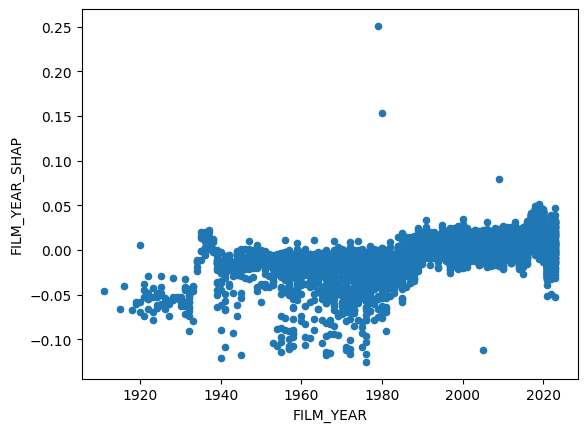

In [52]:
feature_df.plot(kind='scatter', x=select_a_feature, y=select_a_feature+'_SHAP')

c:\Users\tomdevine\Desktop\dev\PersonalProjects\letterboxd-app\letterboxd-env\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='FILM_YEAR', ylabel='ALGO_SCORE'>

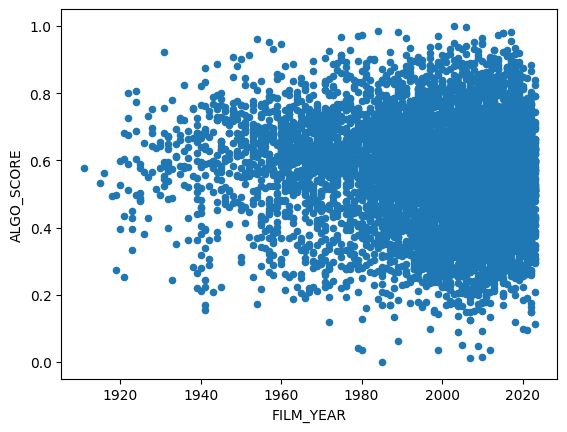

In [53]:
feature_df.plot(kind='scatter', x=select_a_feature, y='ALGO_SCORE')

c:\Users\tomdevine\Desktop\dev\PersonalProjects\letterboxd-app\letterboxd-env\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='FILM_YEAR', ylabel='PREDICTION'>

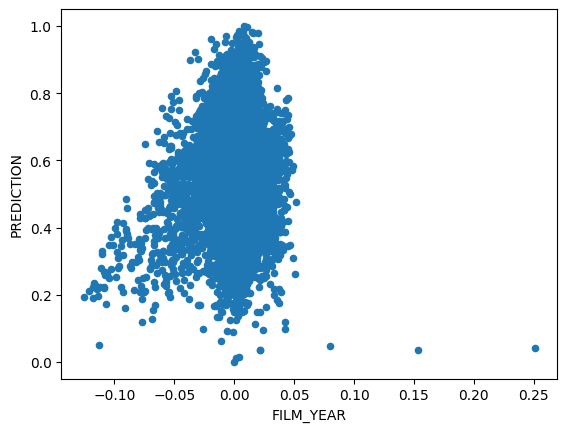

In [44]:
shap_df[['FILM_YEAR', 'PREDICTION']].plot(kind='scatter', x='FILM_YEAR', y='PREDICTION')